In [208]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [209]:
my_fyle = "/data/groceries - groceries.csv"
data = pd.read_csv(str(os.getcwd())+ my_fyle).drop(	columns="Item(s)")
data = data.astype(object).replace(np.nan, None)


In [210]:
data_list = []
for i in range(len(data)):
    data_list.append(list(filter(None, data.values[i])))


In [211]:
encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(data_list)

encode_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [212]:
encode_.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [213]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [214]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [215]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.3,support_only=False)

rules = rules[rules["lift"] > 2].reset_index(drop =True)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
1,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
2,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
3,(cream cheese),(yogurt),0.039654,0.139502,0.012405,0.312821,2.242412,0.006873,1.252218
4,(curd),(yogurt),0.053279,0.139502,0.017285,0.324427,2.325615,0.009853,1.273732


In [216]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [446]:
confidence_table = rules[["antecedents","consequents", "confidence"]].head(5)
confidence_table

,antecedents,consequents,confidence
0,beef,root vegetables,0.331395
1,berries,yogurt,0.318043
2,chicken,other vegetables,0.417062
3,cream cheese,yogurt,0.312821
4,curd,yogurt,0.324427


In [386]:
G=nx.from_pandas_edgelist(confidence_table, 'antecedents', 'consequents')
sizes = (confidence_table['confidence'].values*100).astype(np.float)

In [356]:
l1 = []

for i in G.nodes:
    if confidence_table[confidence_table["antecedents"] == i].empty:
        l1.append([0])
    else:
        l1.append(confidence_table[confidence_table["antecedents"] == i]["confidence"].values.tolist())

l2 = []

for i in G.nodes:
    if confidence_table[confidence_table["consequents"] == i].empty:
        l2.append([0])
    else:
        l2.append(confidence_table[confidence_table["consequents"] == i]["confidence"].values.tolist())

In [404]:
l3 = []
for i in range(len(l1)):
    l3.append(l1[i] +l2[i]) 
    l3[i] = sum(l3[i])*1000

In [449]:
color = pd.DataFrame(range(len(confidence_table)), columns=["colors"])
color  = color.assign(colors =lambda x: (100 - (confidence_table["confidence"]*100)) )
color

,colors
0,66.860465
1,68.195719
2,58.293839
3,68.717949
4,67.557252


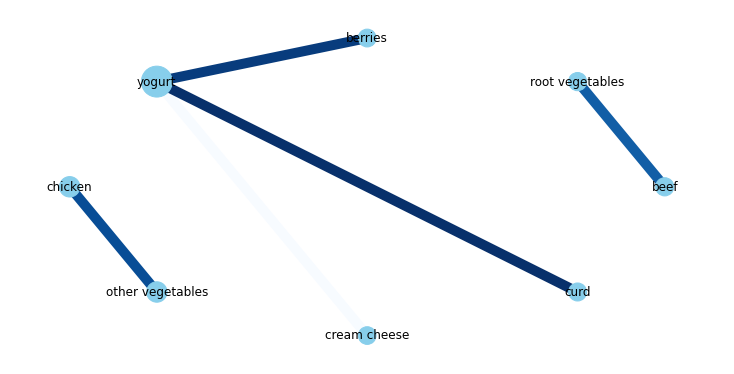

In [450]:
plt.figure(figsize=(10,5))
nx.draw(G, with_labels=True, node_color='skyblue',node_size=l3,width=10, edge_color=color["colors"],  edge_cmap=plt.cm.Blues,pos=nx.circular_layout(G))
plt.show()